<a href="https://colab.research.google.com/github/giuanm/FT_YOLO_sharp_objects/blob/main/V2_PosTech_IA_Devs_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os, glob, yaml

drive.mount('/content/drive')
%cd /content/drive/MyDrive/PosTech_IA_Devs_Hackathon
# Confirma estrutura
!ls -Rlh combined_dataset_v3

A saída de streaming foi truncada nas últimas 5000 linhas.
-rw------- 1 root root  294 Apr 29 17:31 4081d4e9-f242-4267-b9f3-834dc09b22d3_jpeg.rf.21fb7ec22475b60ca86b2cee4a015d0b.txt
-rw------- 1 root root  129 Apr 29 17:31 40bcd39088fb8cc94b5ee44d6558c693_jpg.rf.7904a12a9d7767dee02e24efba12773c.txt
-rw------- 1 root root  128 Apr 29 17:31 40bf2149-db04-4ddd-b485-799e274dcd18_jpg.rf.aced4f72214e4e1af4e41f69fe9345b2.txt
-rw------- 1 root root  119 Apr 29 17:31 40ed51cb7685df823ff97e264885d538_jpg.rf.086cc24f9a5920e20e262697202f3da7.txt
-rw------- 1 root root  419 Apr 29 17:31 40_jpg.rf.eaf822f2b57908059aad81dcc898bb8b.txt
-rw------- 1 root root   82 Apr 29 17:31 41229f5b-bb1e-4d06-bbd3-284bf30b404b_jpg.rf.b32955a179678f42905156b542f651bc.txt
-rw------- 1 root root  585 Apr 29 17:31 412d457bc9d23210109e6c12c1e6bd4f_jpg.rf.1c53d7c3aa5fac8b211fdb02f2cfbf05.txt
-rw------- 1 root root  609 Apr 29 17:31 412d457bc9d23210109e6c12c1e6bd4f_jpg.rf.b9102110391a1b0166ba43f8b3713840.txt
-rw------- 1 r

In [ ]:
# 2.1 Descompactar se necessário
if not os.path.exists('combined_dataset_v3'):
    print("Descompactando combined_v3.zip...")
    !unzip -oq combined_v3.zip -d .

# 2.2 Verifique a estrutura e contagem de imagens/labels
base = 'combined_dataset_v3'
for split in ['train', 'valid', 'test']:
    imgs = glob.glob(f"{base}/{split}/images/*.*")
    lbls = glob.glob(f"{base}/{split}/labels/*.txt")
    print(f"{split:5s}: imagens={len(imgs):4d}, labels={len(lbls):4d}")

train: imagens=4081, labels=4081
valid: imagens= 651, labels= 651
test : imagens= 555, labels= 555


In [ ]:
# 4.1 Instalar versão fixa do ultralytics
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 103.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.1 MB/s eta 0:00:00


In [ ]:
# 4.2 Verificar ambiente
import ultralytics
ultralytics.checks()  # deve mostrar Python, torch, CUDA e "Setup complete ✅"

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.2/112.6 GB disk)


In [ ]:
# Ler e imprimir data.yaml com latin-1 para evitar erros de encoding
import io, yaml, glob, os

DATA_YAML = 'combined_dataset_v3/data.yaml'
print('=== data.yaml (safe read) ===')
with io.open(DATA_YAML, 'r', encoding='latin-1', errors='ignore') as f:
    raw = f.read()
    data = yaml.safe_load(raw)
    print(yaml.dump(data, sort_keys=False))
print('===============================')

# Contar imagens/labels por split
def count_split(split):
    imgs = glob.glob(os.path.join('combined_dataset_v3', split, 'images', '*.*'))
    lbls = glob.glob(os.path.join('combined_dataset_v3', split, 'labels', '*.txt'))
    print(f"{split}: imagens={len(imgs):4d}, labels={len(lbls):4d}")

for s in ['train','valid','test']:
    count_split(s)


=== data.yaml (safe read) ===
train: ./train/images
val: ./valid/images
test: ./test/images
nc: 2
names:
- knife
- cutter

train: imagens=4081, labels=4081
valid: imagens= 651, labels= 651
test: imagens= 555, labels= 555


In [ ]:
# Caminho para o data.yaml (v3 - knife/cutter, 80/10/10 split)
DATA_YAML_PATH = '/content/drive/MyDrive/PosTech_IA_Devs_Hackathon/combined_dataset_v3/data.yaml'

# Nome do experimento final
EXPERIMENT_NAME = 'yolov8l_kc_v3_A100_final'

MODEL_TYPE = 'yolov8l.pt'
EPOCHS = 200
IMG_SIZE = 640
BATCH_SIZE = 64
OPTIMIZER = 'AdamW'
PATIENCE = 50
SAVE_PERIOD = 50
LABEL_SMOOTHING = 0.05

LR0 = 0.005
LRF = 0.01

# Parâmetros de Augmentation (Conjunto Controlado e Moderado)
H = 0.015; S = 0.7; V = 0.4 # HSV
DEG = 10.0; TRA = 0.1; SCA = 0.5; SHE = 2.0; PER = 0.0 # Geo (Moderados)
FUD = 0.0; FLR = 0.5 # Flips
MOS = 1.0 # Mosaic é importante

# Comando de treino
!yolo task=detect mode=train \
model=$MODEL_TYPE \
data=$DATA_YAML_PATH \
epochs=$EPOCHS \
imgsz=$IMG_SIZE \
batch=$BATCH_SIZE \
name=$EXPERIMENT_NAME \
optimizer=$OPTIMIZER \
patience=$PATIENCE \
save_period=$SAVE_PERIOD \
lr0=$LR0 \
lrf=$LRF \
hsv_h=$H hsv_s=$S hsv_v=$V \
degrees=$DEG translate=$TRA scale=$SCA shear=$SHE perspective=$PER \
flipud=$FUD fliplr=$FLR \
mosaic=$MOS

Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/PosTech_IA_Devs_Hackathon/combined_dataset_v3/data.yaml, epochs=200, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=50, cache=False, device=None, workers=8, project=None, name=yolov8l_kc_v3_A100_final, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=F

In [ ]:
from ultralytics import YOLO

PROJECT_ROOT = '/content/drive/MyDrive/PosTech_IA_Devs_Hackathon/runs/detect/'

best_model = f"{PROJECT_ROOT}/{EXPERIMENT_NAME}/weights/best.pt"
print('Carregando:', best_model)
model = YOLO(best_model)
print('🔍 Classes no modelo:', model.names)

Carregando: /content/drive/MyDrive/PosTech_IA_Devs_Hackathon/runs/detect//yolov8l_kc_v3_A100_final/weights/best.pt
🔍 Classes no modelo: {0: 'knife', 1: 'cutter'}


In [ ]:
def validate_model(model, data_yaml, batch):
    print('\nIniciando validação...')
    metrics = model.val(data=data_yaml, split='val', batch=batch//2, plots=True)
    return metrics

metrics = validate_model(model, DATA_YAML_PATH, BATCH_SIZE)


Iniciando validação...
Ultralytics 8.3.120 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 43,608,150 parameters, 0 gradients, 164.8 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 27.7±19.1 MB/s, size: 47.7 KB)


val: Scanning /content/drive/MyDrive/PosTech_IA_Devs_Hackathon/combined_dataset_v3/valid/labels.cache... 651 images, 4 backgrounds, 0 corrupt: 100%|██████████| 651/651 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:07<00:00,  2.64it/s]


                   all        651       1577      0.938      0.948      0.966      0.802
                 knife        336       1063       0.93      0.959      0.959      0.792
                cutter        311        514      0.946      0.938      0.973      0.812
Speed: 0.7ms preprocess, 3.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2



image 1/1 /content/drive/MyDrive/PosTech_IA_Devs_Hackathon/combined_dataset_v3/valid/images/cutter9_jpg.rf.5cc9c9a3f5764397e52f380809561c79.jpg: 640x640 2 cutters, 13.5ms
Speed: 2.4ms preprocess, 13.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


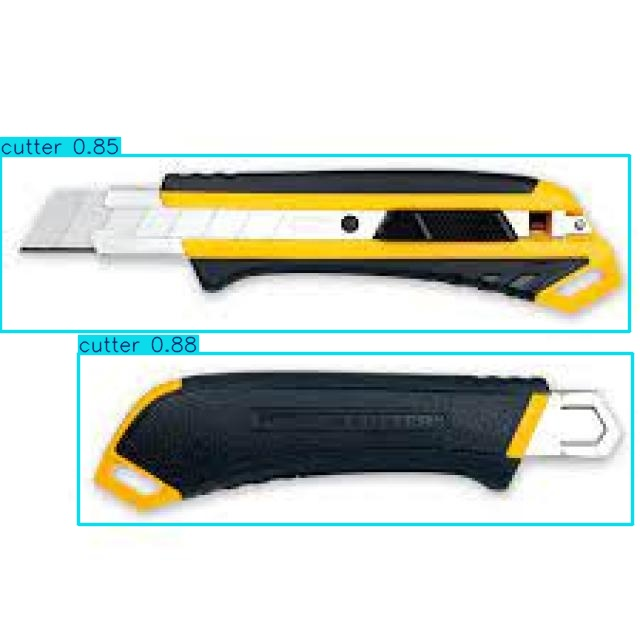

In [ ]:
# Testar em uma imagem de validação
test_img = 'combined_dataset_v3/valid/images/cutter9_jpg.rf.5cc9c9a3f5764397e52f380809561c79.jpg'
# Executar inferência e renderizar resultados
results = model(test_img)
res = results[0]
# Gera a imagem anotada como array
annotated = res.plot()  # retorna image array com boxes
# Salva a cópia anotada em disco
out_dir = 'inference_out'
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, 'annotated_' + os.path.basename(test_img))
import cv2
cv2.imwrite(out_path, annotated)
# Exibe inline
from IPython.display import Image, display
display(Image(out_path))